# Bike Sharing Assignment

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes
2. How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# 1. Import Packages

In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 2. Importing and Understanding The Dataset

In [3]:
#import dataframe
df = pd.read_csv('day.csv')

In [4]:
#Seeing the sample of the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Understanding the columns in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Seeing the description of data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.shape

(730, 16)

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# 3. Visualizing the Data

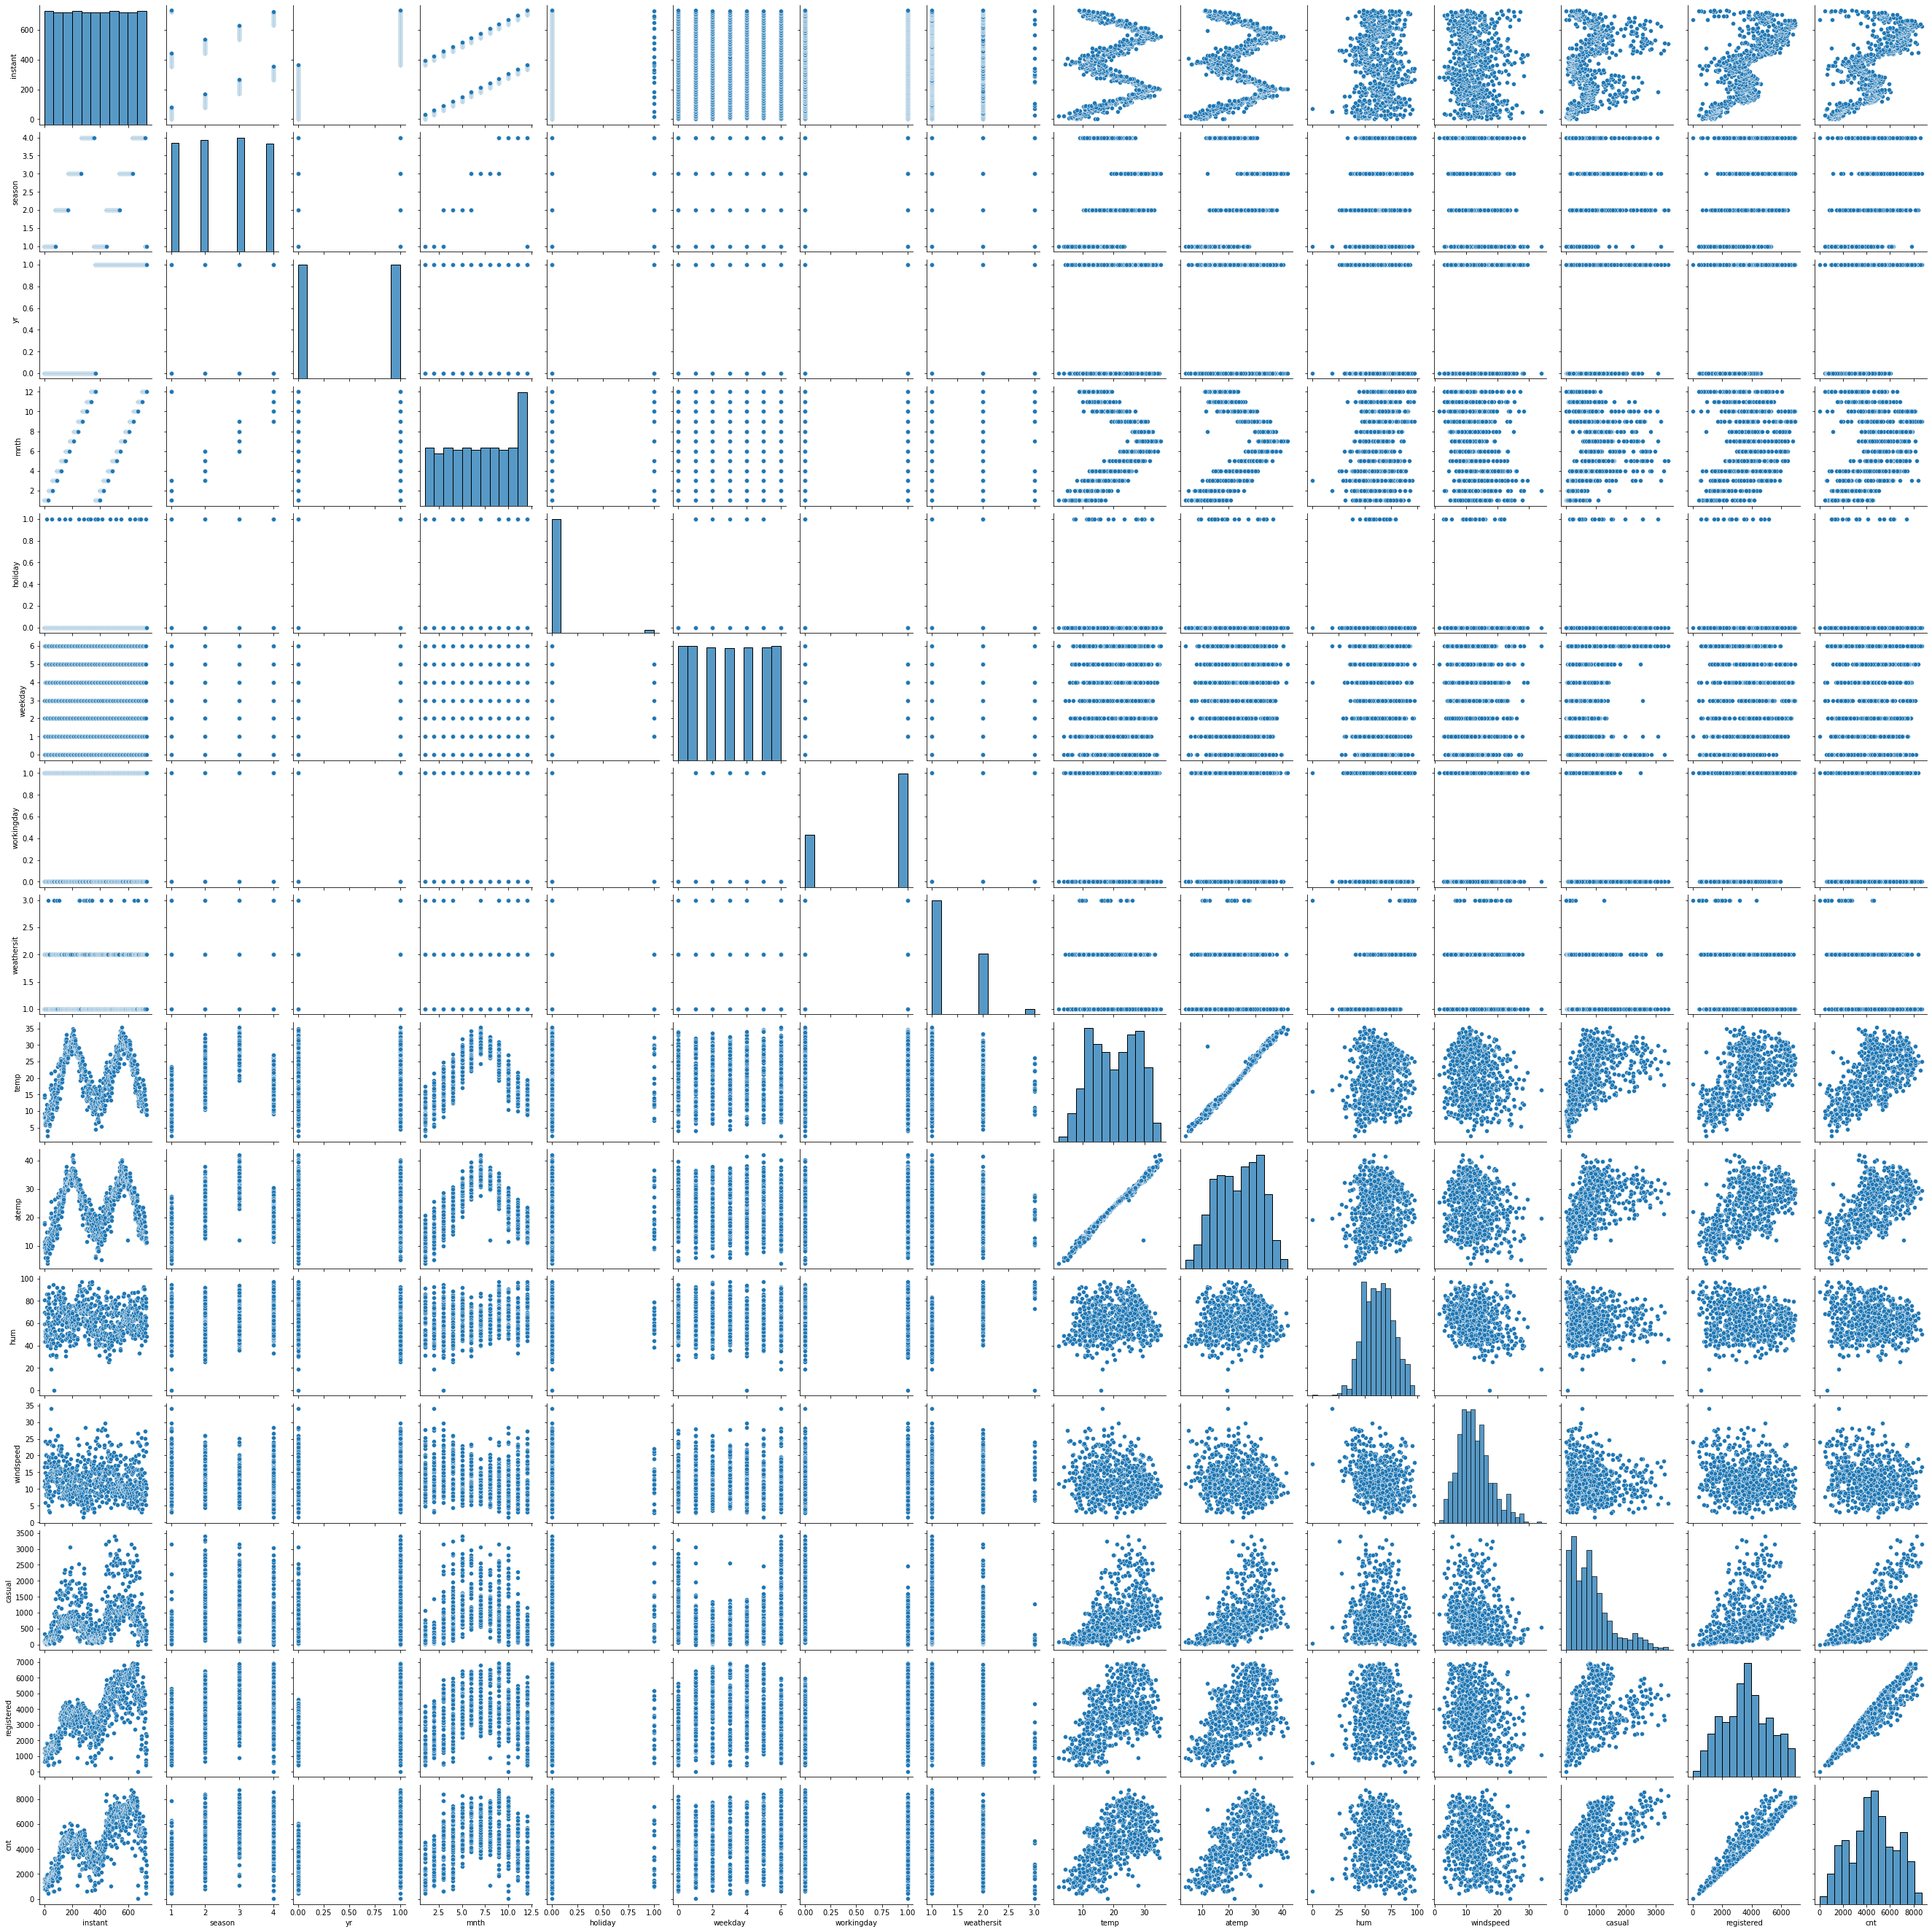

In [9]:
#understanding continuos variables
sns.pairplot(df)

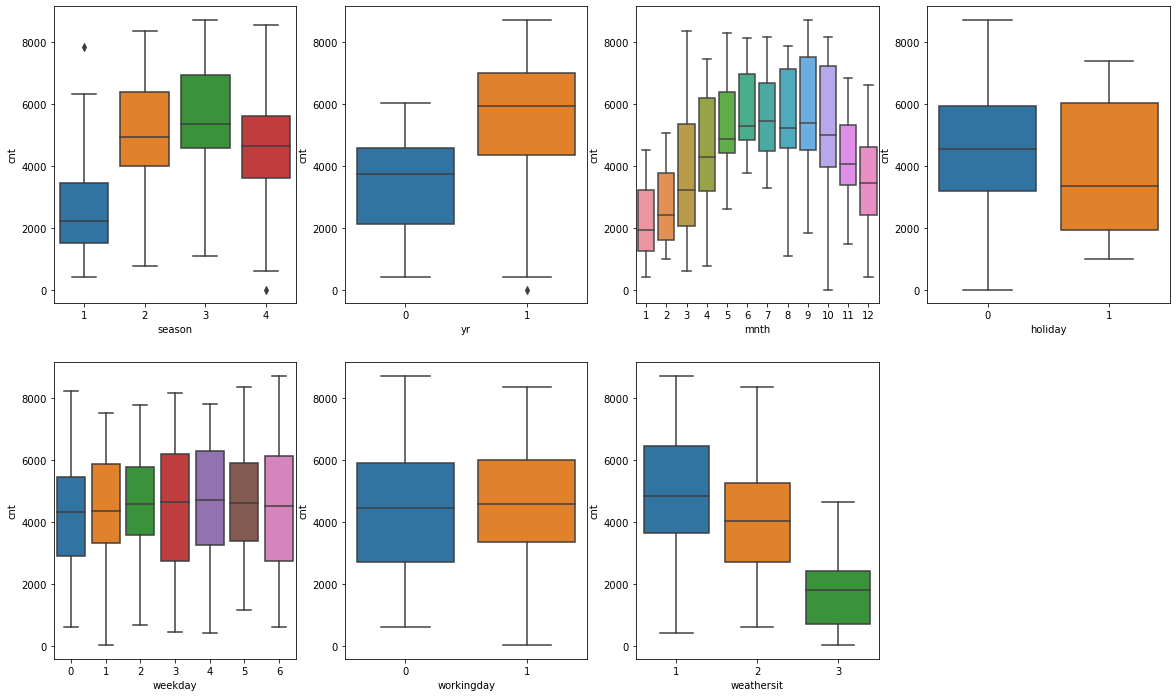

In [10]:
#Visualizing categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

# 4. Preparing the Dataset

In [11]:
#Dropping columns not necessary for analysis
df_bike = df.drop(columns = ['instant', 'casual', 'registered', 'dteday'])
df_bike.head(100)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,0,4,0,3,1,1,16.024153,19.38040,47.0833,17.625221,2808
96,2,0,4,0,4,1,1,17.937500,21.68480,60.2917,10.874904,3141
97,2,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,1471
98,2,0,4,0,6,0,2,14.042500,17.07645,87.7500,8.916561,2455


We are dropping the above columns because:
1. 'instant' is an index column.
2. 'casual' and 'registered' sum up to cnt.
3. Because we already have month, year, workingday and related date time features to account for date. So to preserve simplicity of the model I am dropping the above variables.

### 4a. Encoding Categorical Variables

In [12]:
#Dummy Encoding variables
variables_to_dummy_encode = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [13]:
df_bike_dummy = pd.get_dummies(df_bike, prefix = {'season': 'season', 
                                           'mnth':'mnth', 
                                           'holiday':'holiday', 
                                           'weekday':'weekday',
                                           'workingday':'workingday',
                                           'weathersit':'weathersit', 
                                            },
                                            columns = variables_to_dummy_encode, drop_first = True)

In [16]:
df_bike_dummy.head(100)

,yr,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,16.024153,19.38040,47.0833,17.625221,2808,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
96,0,17.937500,21.68480,60.2917,10.874904,3141,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
97,0,13.769153,16.22395,83.6250,15.208464,1471,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
98,0,14.042500,17.07645,87.7500,8.916561,2455,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### 4b.Splitting the dataset into train and test

In [16]:
df_train, df_test = train_test_split(df_bike_dummy, train_size = 0.7, random_state = 100)

In [17]:
df_train.shape

(510, 30)

In [18]:
df_test.shape

(220, 30)

### 4c. Scaling the data

In [19]:
#rescaling the dataset
#Normalization
scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [20]:
df_train.describe()

,yr,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.537440,0.513156,0.650480,0.320883,4485.337255,0.247059,0.262745,0.247059,0.066667,...,0.025490,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.676471,0.345098,0.029412
std,0.500429,0.225858,0.212410,0.145846,0.169803,1950.666077,0.431725,0.440557,0.431725,0.249689,...,0.157763,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.468282,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


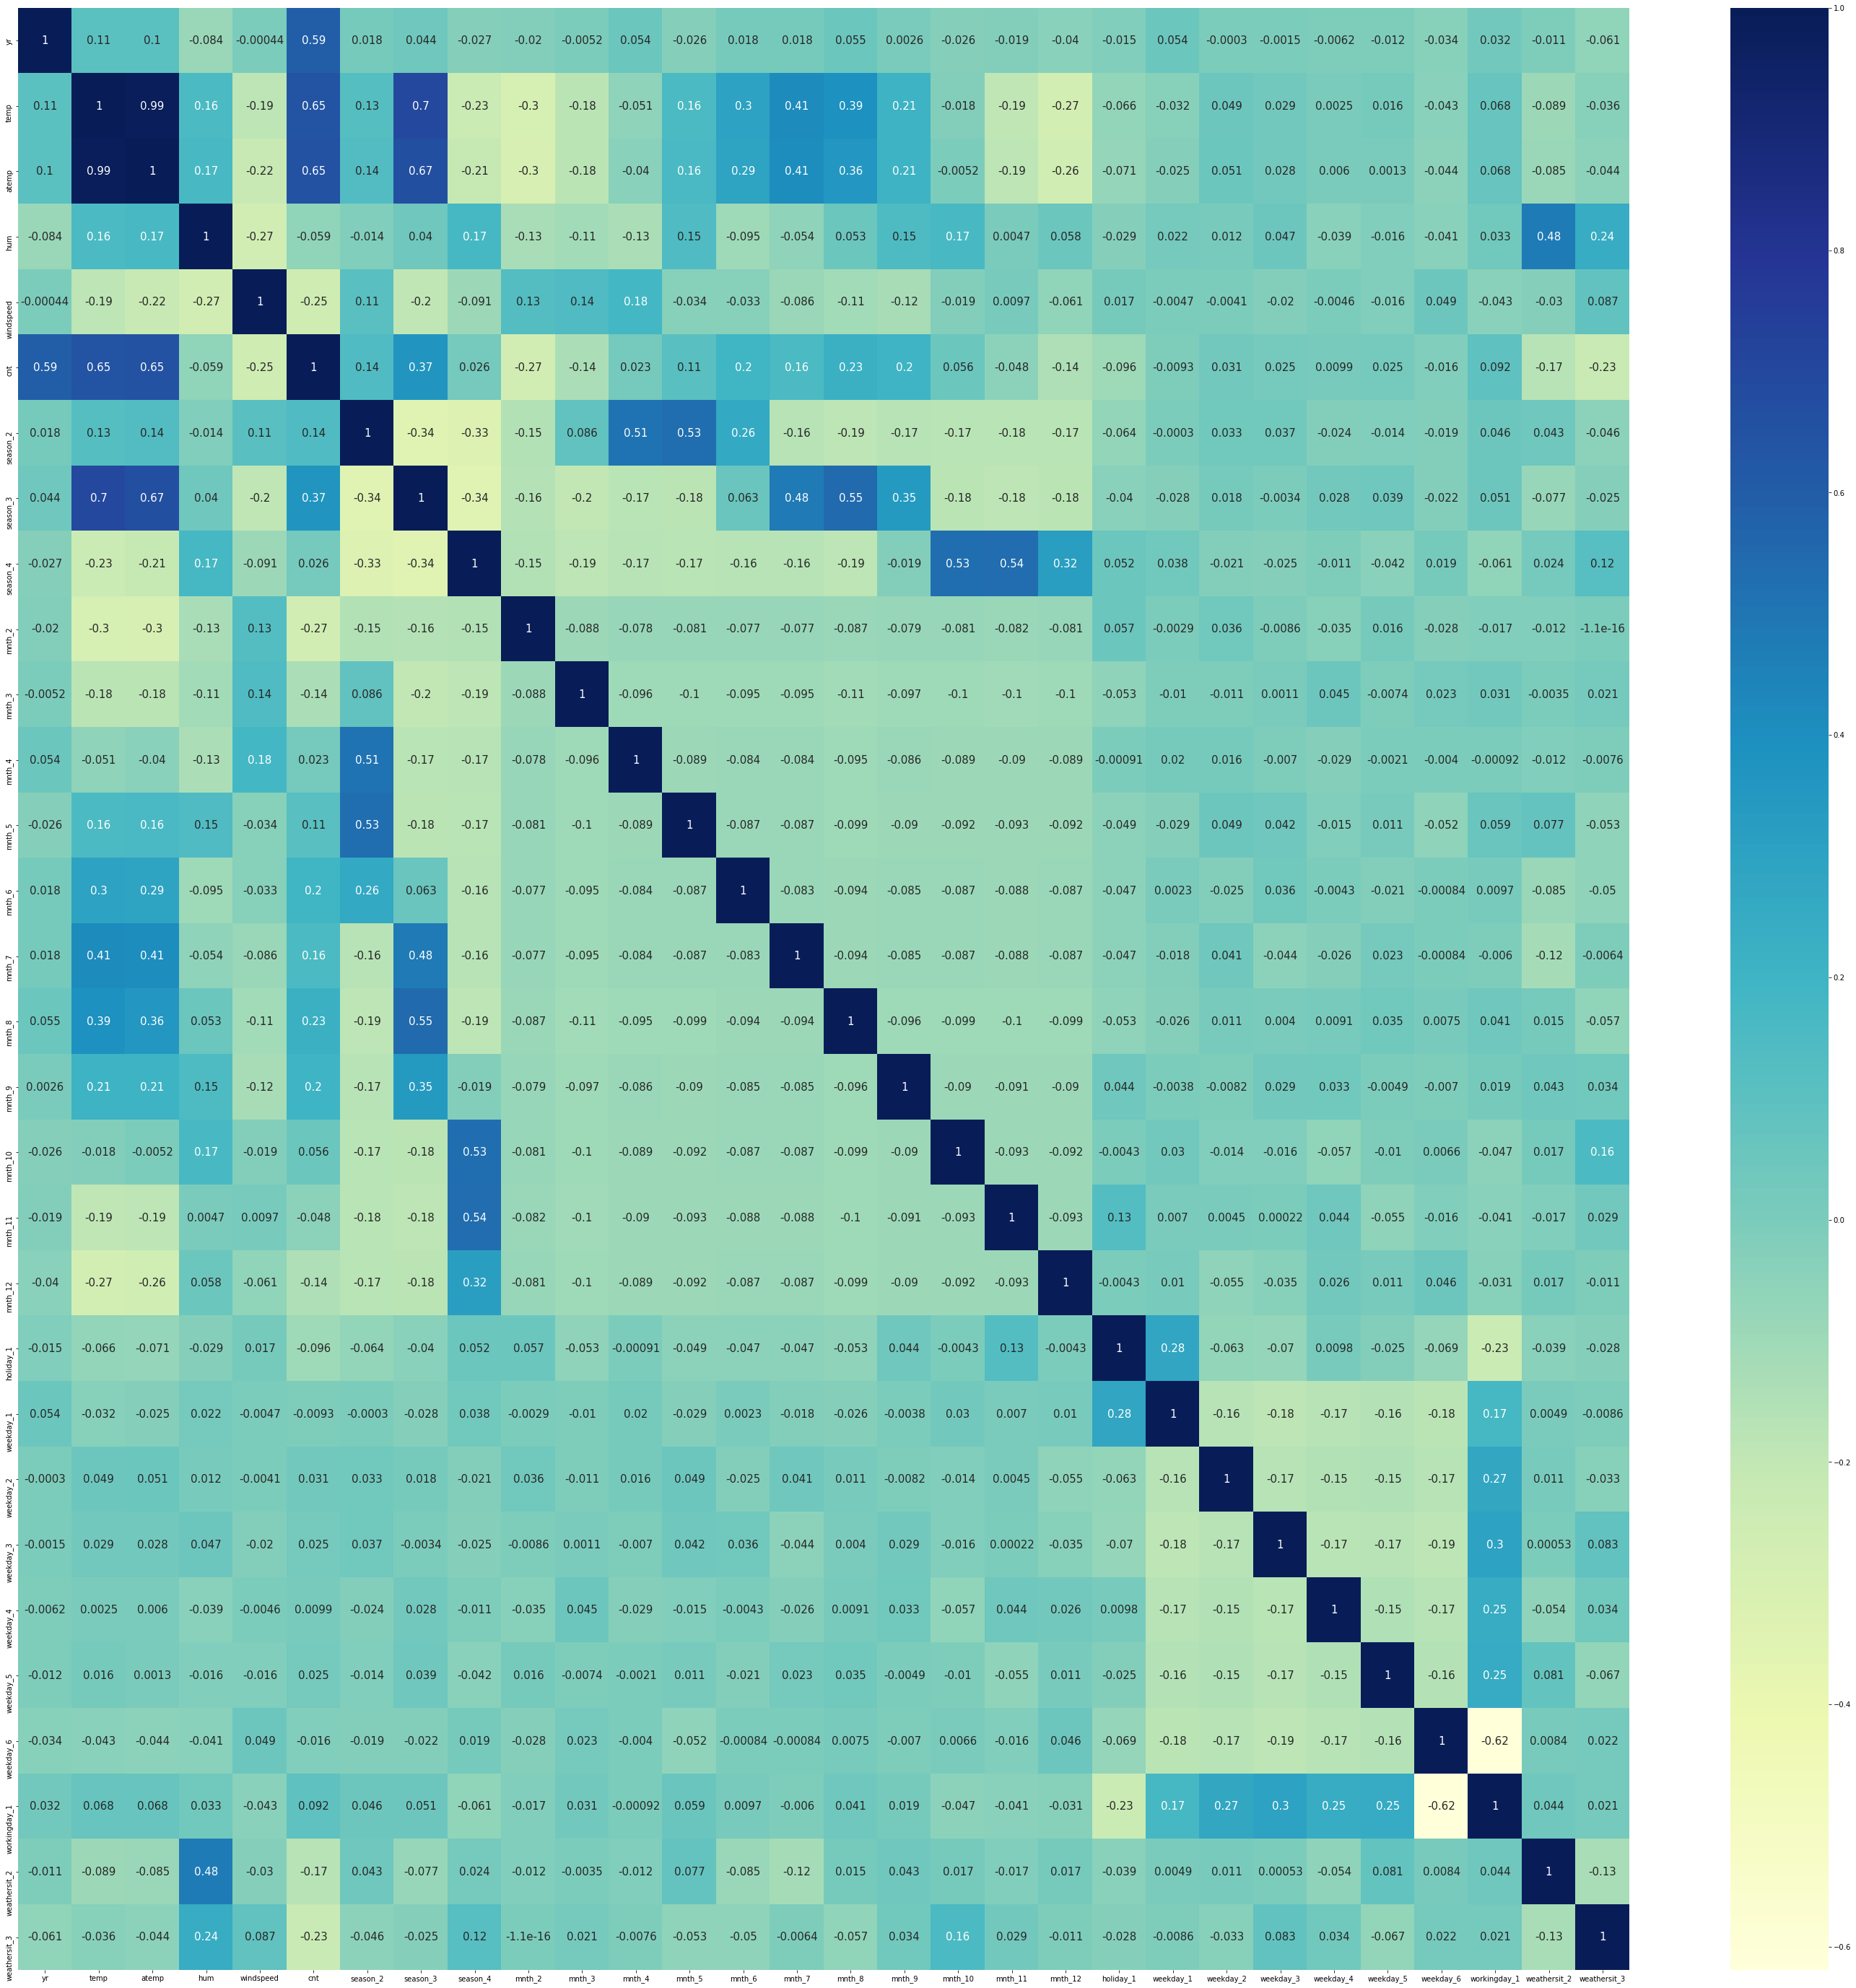

In [21]:
plt.figure(figsize = (50, 50))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", annot_kws={"fontsize":15})
plt.show()

# 5. Building The Model

In [22]:
y_train = df_train.pop('cnt')
X_train = df_train

### 5a. Using RFE to identify most important features

In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
X_train.shape

(510, 29)

I am choosing a limit of 20 variables so as to not to complicate the model and overfit it.

In [25]:
#limiting features to 20
rfe = RFE(lm, 20)

In [26]:
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 3),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 4),
 ('mnth_12', False, 5),
 ('holiday_1', True, 1),
 ('weekday_1', False, 6),
 ('weekday_2', False, 7),
 ('weekday_3', False, 9),
 ('weekday_4', False, 10),
 ('weekday_5', False, 8),
 ('weekday_6', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [28]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9',
       'mnth_10', 'holiday_1', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_7', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.53e-187
Time:                        19:35:41   Log-Likelihood:                -4101.3
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     489   BIC:                             8334.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1680.0203    253.058      6.639   

#### Variable atemp has high p value. We can drop that.

In [32]:
#Creating the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,61.64
0,const,55.37
3,atemp,54.98
7,season_3,6.71
6,season_2,5.64
11,mnth_5,3.42
10,mnth_4,3.09
8,season_4,2.45
12,mnth_6,2.32
4,hum,1.98


In [33]:
X_train_rfe.drop(columns = ['atemp'], inplace = True)

In [34]:
X_train_rfe.drop(columns = ['const'], inplace = True)

In [35]:
#Refitting the model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.29e-188
Time:                        19:35:41   Log-Likelihood:                -4101.3
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     490   BIC:                             8327.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1682.8993    252.622      6.662   

In [36]:
#Creating the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.28
6,season_3,6.65
5,season_2,5.64
2,temp,4.50
10,mnth_5,3.42
9,mnth_4,3.09
7,season_4,2.44
11,mnth_6,2.32
3,hum,1.97
17,workingday_1,1.89


#### Variable mnth_4 has low VIF and high p value, removing the same

In [37]:
#variable mnth_4 has low VIF and high p value, removing the same
X_train_rfe.drop(columns = ['mnth_4'], inplace = True)

In [38]:
X_train_rfe.drop(columns = ['const'], inplace = True)

In [39]:
#Refitting the model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.9
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.84e-189
Time:                        19:35:42   Log-Likelihood:                -4102.7
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     491   BIC:                             8324.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1715.4999    252.260      6.801   

In [40]:
#Creating the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.93
6,season_3,6.65
2,temp,4.46
5,season_2,2.87
7,season_4,2.41
3,hum,1.96
16,workingday_1,1.89
9,mnth_5,1.84
15,weekday_6,1.79
11,mnth_8,1.78


#### Variable mnth_6 has low VIF and high p value, removing the same.

In [41]:
#variable mnth_6 has low VIF and high p value, removing the same
X_train_rfe.drop(columns = ['mnth_6'], inplace = True)

In [42]:
X_train_rfe.drop(columns = ['const'], inplace = True)

In [43]:
#Refitting the model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          5.55e-190
Time:                        19:35:42   Log-Likelihood:                -4103.4
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     492   BIC:                             8319.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1711.8283    252.308      6.785   

In [44]:
#Creating the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.92
6,season_3,6.49
2,temp,3.84
5,season_2,2.83
7,season_4,2.36
3,hum,1.95
15,workingday_1,1.89
14,weekday_6,1.79
10,mnth_8,1.68
16,weathersit_2,1.57


#### Variable mnth_5 has low VIF and high p value, removing the same

In [45]:
#variable mnth_5 has low VIF and high p value, removing the same
X_train_rfe.drop(columns = ['mnth_5'], inplace = True)

In [46]:
X_train_rfe.drop(columns = ['const'], inplace = True)

In [47]:
#Refitting the model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.46e-190
Time:                        19:35:42   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     493   BIC:                             8315.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1666.3305    251.073      6.637   

In [48]:
#Creating the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.22
6,season_3,6.29
2,temp,3.72
5,season_2,2.66
7,season_4,2.33
3,hum,1.91
14,workingday_1,1.89
13,weekday_6,1.79
9,mnth_8,1.68
15,weathersit_2,1.57


#### Variable season_3 has high VIF and high p value, removing the same

In [49]:
#variable season_3 has high VIF and high p value, removing the same
X_train_rfe.drop(columns = ['season_3'], inplace = True)

In [50]:
X_train_rfe.drop(columns = ['const'], inplace = True)

In [51]:
#Refitting the model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          4.17e-191
Time:                        19:35:43   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1671.2129    251.506      6.645   

In [52]:
#Creating the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.21
13,workingday_1,1.89
3,hum,1.87
12,weekday_6,1.79
6,season_4,1.78
2,temp,1.63
14,weathersit_2,1.56
10,mnth_10,1.49
8,mnth_8,1.47
5,season_2,1.38


#### Variable mnth_3 has low VIF and high p value, removing the same

In [53]:
#variable mnth_3 has low VIF and high p value, removing the same
X_train_rfe.drop(columns = ['mnth_3'], inplace = True)

In [54]:
X_train_rfe.drop(columns = ['const'], inplace = True)

In [55]:
#Refitting the model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          8.70e-192
Time:                        19:35:43   Log-Likelihood:                -4107.3
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     495   BIC:                             8308.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1714.8333    250.082      6.857   

In [56]:
#Creating the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.47
12,workingday_1,1.88
3,hum,1.87
11,weekday_6,1.79
6,season_4,1.71
2,temp,1.59
13,weathersit_2,1.56
9,mnth_10,1.49
7,mnth_8,1.46
5,season_2,1.38


In [57]:
X_train_rfe.shape

(510, 15)

### Conclusion from Model Building

Thus we have identified the final model, which has 14 variables which impact the final count of bicycles rented. These are as follows (in decreasing order of the absolute value of importance):
1. temp: Days when the temperature is warmer, the number of rented bikes is higher. 
2. weathershit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. When conditions are such the count of bikes rented decreases. 
3. yr: 2019 has witnessed increased number of bike rentals than in 2018. 
4. windspeed: Higher the windspeed lower is the number of bikes rented. 
5. hum: High humid conditions result in lower bike rentals. 
5. season_4: In winters people prefer to bike more. 
6. mnth_9: From September onwards bike rentals starts to soar. 
7. season_2: People prefer renting bikes in the summer. 
8. weathershit_2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist: Higher conditions as such, lower are the bike rentals. 
9. mnth_8: August: Bike rentals in August contribute to higher bike rental numbers. 
10. holiday_1: On holidays bike rental is lower. 
11. Weekday_6: Saturday's contribute to higher bike rentals.
12. workingday_1: Working days have higher bike rentals. 
13. mnth_10: Rentals in October are positively correlated with the final bike rental counts. 

# 6. Residual Analysis of the Train Data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [58]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

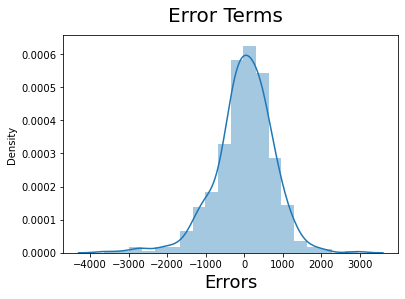

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# 7. Making Predictions on Test Data

In [60]:
#scaling the test data
#Normalization
scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
X_train_rfe.drop(columns = ['const'], inplace = True)

In [63]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [64]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

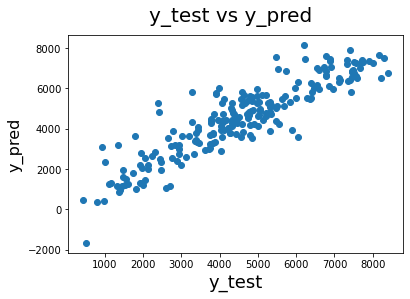

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## 7a. Evaluating Model on the test data

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.807780904740308

So thus we obtained a final model with 14 variables and a test score accuracy of 80.7%.